In [71]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [72]:
data = []
with open('./styles.csv', 'r') as file:
    fashion = csv.reader(file, delimiter=',')
    next(fashion, None)
    for row in fashion:
        if len(row) > 10:
            row = row[:10]
        data.append(row)

In [73]:
columns = ['id','gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

In [74]:
pd.options.display.max_rows = 150
df = pd.DataFrame(data=data, columns=columns)
df


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017,Casual,Rasasi Women Blue Lady Perfume


In [75]:
df.describe()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
count,44446,44446,44446,44446,44446,44446,44446,44446,44446,44446
unique,44446,5,7,45,143,47,5,14,10,31136
top,19687,Men,Apparel,Topwear,Tshirts,Black,Summer,2012,Casual,Lucera Women Silver Earrings
freq,1,22165,21400,15405,7070,9732,21476,16290,34414,82


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44446 non-null  object
 1   gender              44446 non-null  object
 2   masterCategory      44446 non-null  object
 3   subCategory         44446 non-null  object
 4   articleType         44446 non-null  object
 5   baseColour          44446 non-null  object
 6   season              44446 non-null  object
 7   year                44446 non-null  object
 8   usage               44446 non-null  object
 9   productDisplayName  44446 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [77]:
for col in ['gender', 'articleType', 'baseColour']:
    print(f"Attributes: {df[col].unique()}, Length: {len(df[col].unique())}")


Attributes: ['Men' 'Women' 'Boys' 'Girls' 'Unisex'], Length: 5
Attributes: ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees'
 'Perfume and Body Mist' 'Heels' 'Sunglasses' 'Innerwear Vests' 'Pendant'
 'Nail Polish' 'Laptop Bag' 'Scarves' 'Rain Jacket' 'Dresses'
 'Night suits' 'Skirts' 'Wallets' 'Blazers' 'Ring' 'Kurta Sets' 'Clutches'
 'Shrug' 'Backpacks' 'Caps' 'Trousers' 'Earrings' 'Camisoles' 'Boxers'
 'Jewellery Set' 'Dupatta' 'Capris' 'Lip Gloss' 'Bath Robe' 'Mufflers'
 'Tunics' 'Jackets' 'Trunk' 'Lounge Pants' 'Face Wash and Cleanser'
 'Necklace and Chains' 'Duffel Bag' 'Sports Sandals'
 'Foundation and Primer' 'Sweaters' 'Free Gifts' 'Trolley Bag'
 'Tracksuits' 'Swimwear' 'Shoe Laces' 'Fragrance Gift Set' 'Bangle'
 'Nightdress' 'Ties' 'Baby Dolls' 

In [78]:
for col in ['gender', 'articleType', 'baseColour']:
    print(df[col].isnull().sum())

0
0
0


In [79]:
for col in ['gender', 'articleType', 'baseColour']:
    print(df[col].value_counts())

Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: gender, dtype: int64
Tshirts                      7070
Shirts                       3217
Casual Shoes                 2846
Watches                      2542
Sports Shoes                 2036
Kurtas                       1844
Tops                         1762
Handbags                     1759
Heels                        1323
Sunglasses                   1073
Wallets                       936
Flip Flops                    916
Sandals                       897
Briefs                        849
Belts                         813
Backpacks                     724
Socks                         686
Formal Shoes                  637
Perfume and Body Mist         614
Jeans                         609
Shorts                        547
Trousers                      530
Flats                         500
Bra                           477
Dresses                       464
Sarees                        427
Earrings 

Text(0.5, 1.0, 'Distribusi Jenis Kelamin')

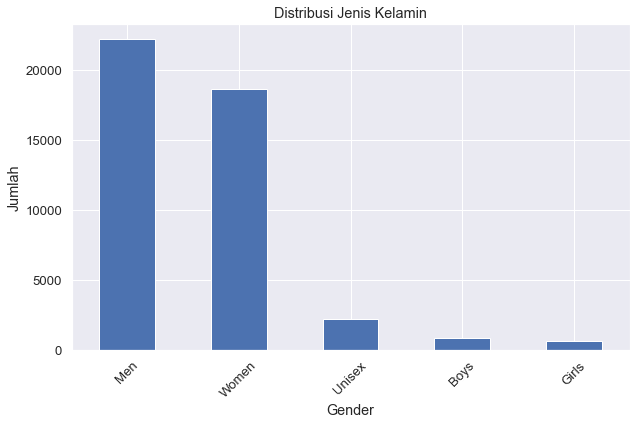

In [84]:
sns.set(font_scale=1.2)
df['gender'].value_counts().plot(kind='bar', figsize=(10, 6), rot=45)
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Distribusi Jenis Kelamin')

Text(0.5, 1.0, 'Distribusi Jenis Kelamin')

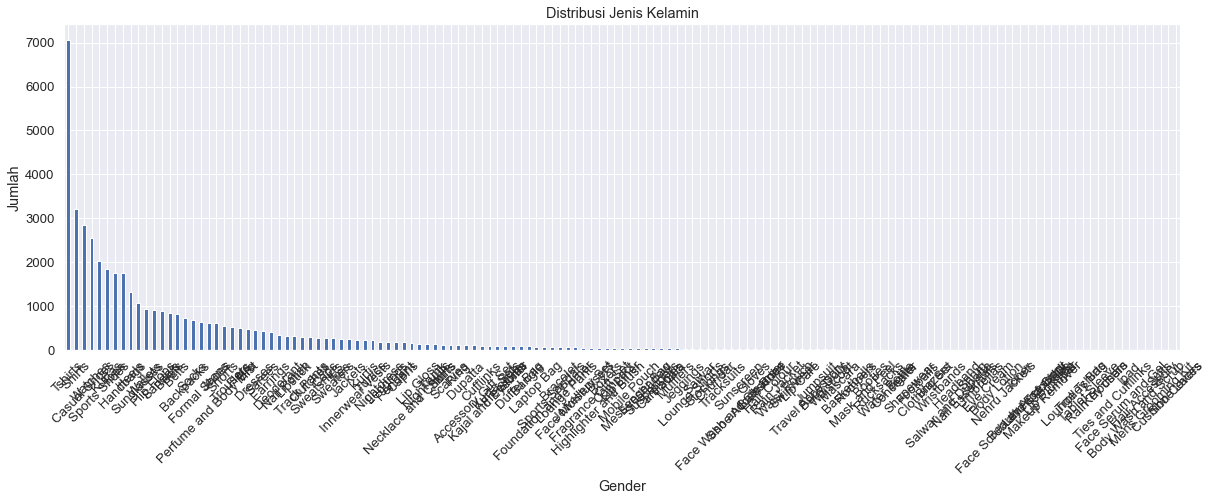

In [91]:
sns.set(font_scale=1.2)
df['articleType'].value_counts().plot(kind='bar', figsize=(20, 6), rot=45)
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Distribusi Jenis Kelamin')

Text(0.5, 1.0, 'Distribusi Jenis ')

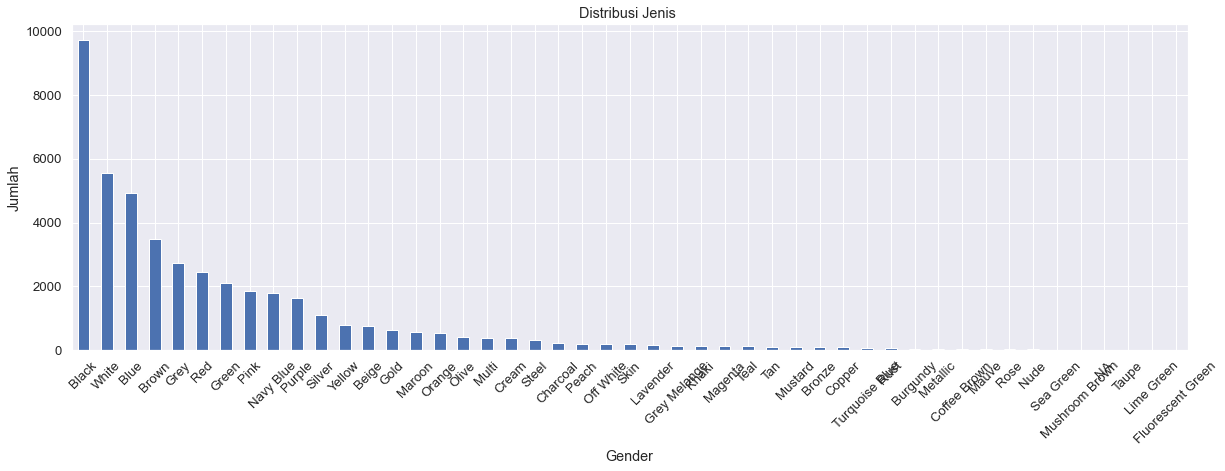

In [94]:
sns.set(font_scale=1.2)
df['baseColour'].value_counts().plot(kind='bar', figsize=(20, 6), rot=45)
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Distribusi Jenis ')

In [96]:
print(np.random.seed(42))

None


In [97]:
import os
image_name = os.path.join(
                './', 'images', str(1) + '.jpg')
image_name

'./images\\1.jpg'